# Data Analysis of the Qur'an

![Bismillah-hir-rahman-nir-raheem.webp](https://cdn.shortpixel.ai/spai/w_314+q_lossy+ret_img+to_webp/https://myislam.org/wp-content/uploads/2019/03/Bismillah-hir-rahman-nir-raheem.jpg)

## Abstract
The purpose of this data science project is to find hidden patterns and trends in Allah's Word. I believe that since the Qur'an is a heavenly book, that is, it has metaphysical origins, it has to have certain answers to some questions of our day.

I don't know what Islamic school of theology (creed) this would come under, but I for one believe that Allah has revealed major things to our beloved Prophet (PBUH); as well as minor things or facts in the Qur'an that are right in front of the reader, but it takes rationale and observation to find such facts.

For example, no human being (except the Prophet peace be upon him; maybe) knew about the linguistics of the Qur'an, in such a way, that antonyms like 'day' and 'night' both occur 365 times (which is the number of days in a typical year); or the words 'man' and 'woman' both occur 23 times (which is the number of pairs of chromosomes in the DNA).

## Objectives
🚨 This section will keep updating; I will mention in commit message what new objective has been added
### 1. Summary of the Qur'anic structure

In [8]:
import requests
res = requests.get('https://api.quran.com/api/v4/chapters?language=en')
json = res.json()

Before converting the JSON object to Pandas DataFrame, I will see what keys are in the json

In [13]:
print('Keys in the JSON:')
print(json.keys())

Keys in the JSON:
dict_keys(['chapters'])


So that doesn't give us much; let's see what the datatype of `chapters` is

In [19]:
chapters = json['chapters']
type(chapters)

list

In [21]:
len(chapters)

114

So there are 114 total objects, describing 114 chapters of the Qur'an. let's see what every JSON objects has in store.

We'll just look at the first one, i.e. Surah al-Fatiha

In [22]:
chapters[0]

{'id': 1,
 'revelation_place': 'makkah',
 'revelation_order': 5,
 'bismillah_pre': False,
 'name_simple': 'Al-Fatihah',
 'name_complex': 'Al-Fātiĥah',
 'name_arabic': 'الفاتحة',
 'verses_count': 7,
 'pages': [1, 1],
 'translated_name': {'language_name': 'english', 'name': 'The Opener'}}

So what matters to us mostly are the variables `revelation_place`, `revelation_order`, `verses_count` and later `translated_name` (when we would use NLP to find patterns)

#### Now, time for some EDA...

What is the frequency of verses in every chapter?

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
freq_of_verses = np.array([chapter['verses_count'] for chapter in chapters])
freq_of_verses

array([  7, 286, 200, 176, 120, 165, 206,  75, 129, 109, 123, 111,  43,
        52,  99, 128, 111, 110,  98, 135, 112,  78, 118,  64,  77, 227,
        93,  88,  69,  60,  34,  30,  73,  54,  45,  83, 182,  88,  75,
        85,  54,  53,  89,  59,  37,  35,  38,  29,  18,  45,  60,  49,
        62,  55,  78,  96,  29,  22,  24,  13,  14,  11,  11,  18,  12,
        12,  30,  52,  52,  44,  28,  28,  20,  56,  40,  31,  50,  40,
        46,  42,  29,  19,  36,  25,  22,  17,  19,  26,  30,  20,  15,
        21,  11,   8,   8,  19,   5,   8,   8,  11,  11,   8,   3,   9,
         5,   4,   7,   3,   6,   3,   5,   4,   5,   6])

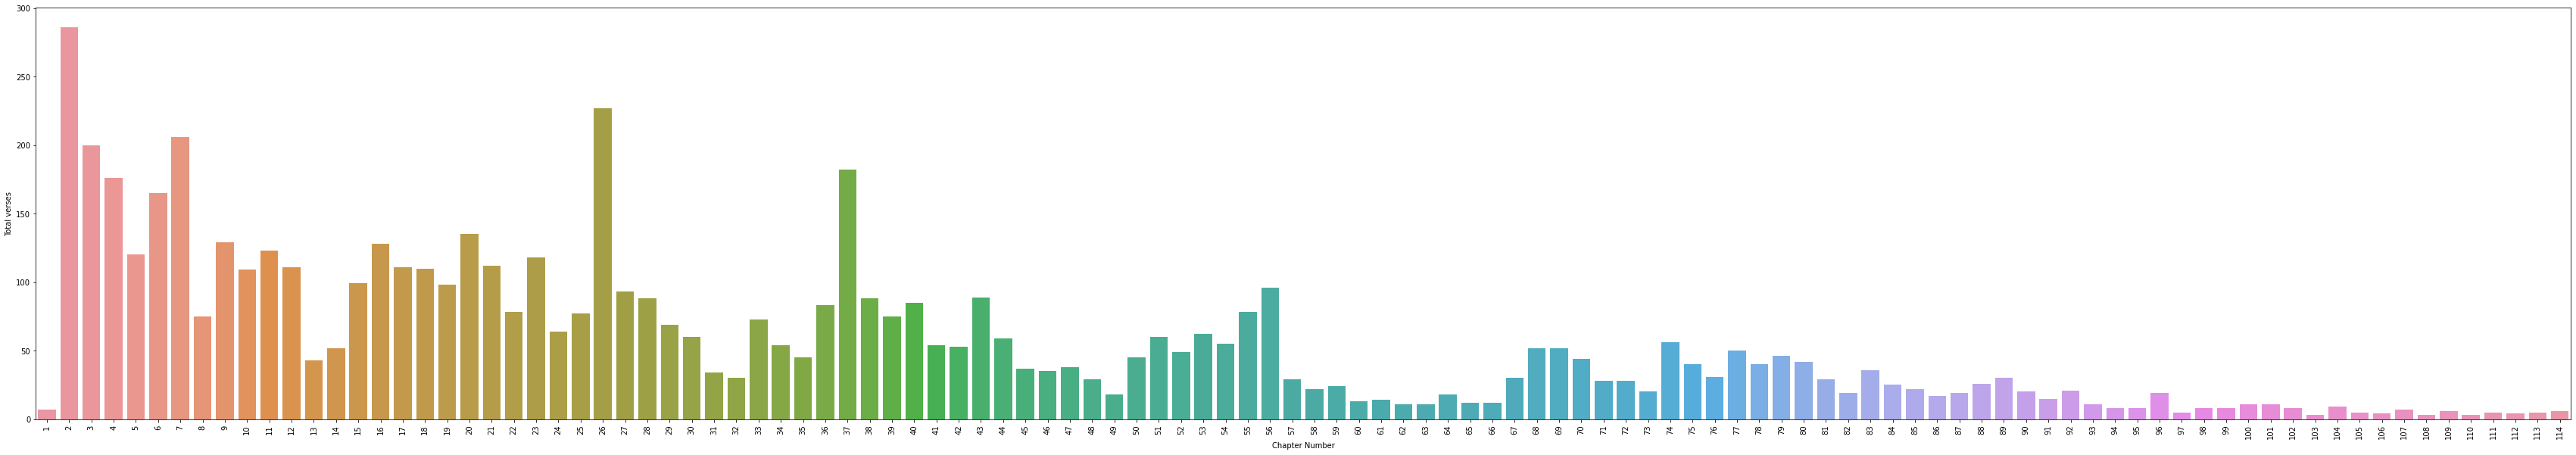

In [102]:
plt.figure(figsize=(60,10))
sns.barplot(x = np.arange(1,115), y = freq_of_verses, errwidth=0)
plt.xlabel('Chapter Number')
plt.ylabel('Total verses')
plt.xticks(rotation=90)
plt.show()

#### What are top 5 chapters with the most verses?

In [110]:
highest_verses = sorted(freq_of_verses, reverse=True)[:5]
top_chapters_with_most_verses_indices = [index+1 for index in range(len(freq_of_verses)) if freq_of_verses[index] in highest_verses]
top_chapters_with_most_verses_indices

[2, 3, 7, 26, 37]

In [114]:
top_chapters_with_most_verses = []
for chapter in chapters:
    if chapter['id'] in top_chapters_with_most_verses_indices:
        top_chapters_with_most_verses.append(chapter['name_simple'])
        
print(f'Top chapters:')
for i in range(5):
    print(f'\t{top_chapters_with_most_verses[i]} ({highest_verses[i]} verses)')

Top chapters:
	Al-Baqarah (286 verses)
	Ali 'Imran (227 verses)
	Al-A'raf (206 verses)
	Ash-Shu'ara (200 verses)
	As-Saffat (182 verses)
